In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import glob
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
bicing_status_cols = ['last_updated', 'station_id', 'num_bikes_available', 'num_docks_available']
bicing_status_2212 = pd.read_csv(r'..\data\raw\bicing_stations_status\2022\2022_12_Desembre_BicingNou_ESTACIONS.csv', usecols=bicing_status_cols)

In [3]:
bicing_status_2212.sample(20)

,station_id,num_bikes_available,num_docks_available,last_updated
780368,133,10,6,1670313004
2226937,47,8,39,1671172475
2641053,222,7,20,1671418481
2027449,33,5,15,1671054002
530640,257,7,17,1670164500
4122065,312,15,20,1672296887
2676874,187,11,8,1671439800
162636,286,0,14,1669945795
943681,435,18,10,1670409877
101393,137,6,19,1669909494


In [4]:
bicing_status_2212.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512523 entries, 0 to 4512522
Data columns (total 4 columns):
 #   Column               Dtype
---  ------               -----
 0   station_id           int64
 1   num_bikes_available  int64
 2   num_docks_available  int64
 3   last_updated         int64
dtypes: int64(4)
memory usage: 137.7 MB


In [5]:
bicing_status_2212.shape

(4512523, 4)

In [6]:
bicing_status_2212.describe().T

,count,mean,std,min,25%,50%,75%,max
station_id,4512523.0,2.615072e+02,149.427218,1.000000e+00,1.320000e+02,2.630000e+02,3.900000e+02,5.190000e+02
num_bikes_available,4512523.0,1.072229e+01,7.664918,0.000000e+00,5.000000e+00,1.000000e+01,1.600000e+01,5.400000e+01
num_docks_available,4512523.0,1.566360e+01,7.858505,0.000000e+00,1.000000e+01,1.600000e+01,2.100000e+01,5.400000e+01
last_updated,4512523.0,1.671189e+09,773538.357338,1.669849e+09,1.670520e+09,1.671190e+09,1.671859e+09,1.672528e+09


In [7]:
bicing_status_2212.memory_usage(deep=True).sum()

144400864

In [8]:
bicing_status_2212.isna().sum()

station_id             0
num_bikes_available    0
num_docks_available    0
last_updated           0
dtype: int64

In [9]:
def clean_bicing_status(df):
    """Cleans the bicing status DataFrame including converting data types, adding new features, and removing unnecessary columns.

    Args:
        df (DataFrame):

    Returns:
        DataFrame:
    """
 
    weekend = {1: False, 2: False, 3: False, 4: False, 5: False, 6: True, 7: True}
    
    def int64_to_uint16(df_):
        cols = df_.select_dtypes('int64')
        return (df_
                .astype({col:'uint16' for col in cols}))
    
    def get_season(month):
        x = month % 12 // 3 + 1
        if x == 1:
            season = 'winter'
        elif x == 2:
            season = 'spring'
        elif x == 3:
            season = 'summer'
        elif x == 4:
            season = 'autumn'
        else:
            season = 'unknown'
        return season

    return (df
            .query('num_bikes_available != 0 and num_docks_available != 0')
            .assign(last_updated=pd.to_datetime(df['last_updated'], unit='s'), 
                    year=lambda df_: df_['last_updated'].dt.year.astype('uint16'),
                    month=lambda df_: df_['last_updated'].dt.month.astype('uint8'),
                    day=lambda df_: df_['last_updated'].dt.day.astype('uint8'),
                    weekday=lambda df_: df_['last_updated'].dt.isocalendar().day.astype('uint8'),
                    hour=lambda df_: df_['last_updated'].dt.hour.astype('uint8'),
                    weekend=lambda df_: df_['weekday'].map(weekend),
                    season=lambda df_: df_['month'].apply(get_season).astype('category'),)    
            .pipe(int64_to_uint16)
            .drop(columns='last_updated')
    )

In [10]:
clean_bicing_status(bicing_status_2212).sample(25)

,station_id,num_bikes_available,num_docks_available,year,month,day,weekday,hour,weekend,season
2051504,362,6,26,2022,12,15,4,1,False,winter
3468287,271,13,8,2022,12,24,6,19,True,winter
3994462,221,16,8,2022,12,28,3,9,False,winter
1992640,71,6,15,2022,12,14,3,15,False,winter
3192078,338,2,32,2022,12,22,4,21,False,winter
2138504,505,3,24,2022,12,15,4,15,False,winter
788970,168,13,14,2022,12,6,2,9,False,winter
4358879,356,21,6,2022,12,30,5,21,False,winter
1015993,27,7,13,2022,12,7,3,22,False,winter
1776883,421,6,19,2022,12,13,2,4,False,winter


In [11]:
clean_bicing_status(bicing_status_2212).info()

<class 'pandas.core.frame.DataFrame'>
Index: 4258134 entries, 0 to 4512522
Data columns (total 10 columns):
 #   Column               Dtype   
---  ------               -----   
 0   station_id           uint16  
 1   num_bikes_available  uint16  
 2   num_docks_available  uint16  
 3   year                 uint16  
 4   month                uint8   
 5   day                  uint8   
 6   weekday              uint8   
 7   hour                 uint8   
 8   weekend              bool    
 9   season               category
dtypes: bool(1), category(1), uint16(4), uint8(4)
memory usage: 89.3 MB


In [12]:
def load_table(year, month, month_name):
    """Loads the bicing stations data from a CSV file.

    Args:
        year (int): The year of the data.
        month (int): The month of the data.
        month_name (str): The name of the month in Catalan.

    Returns:
        DataFrame: A Pandas DataFrame containing the bicing stations data with columns:
            - last_updated: Timestamp of the last update
            - station_id: ID of the station
            - num_bikes_available: Number of available bikes at the station
            - num_docks_available: Number of available docks at the station
    """
    bicing_status_cols = ['last_updated', 'station_id', 'num_bikes_available', 'num_docks_available']
    file_path = fr'..\data\raw\bicing_stations_status\{year}\{year}_{month:02d}_{month_name}_BicingNou_ESTACIONS.csv'
    try:
        return clean_bicing_status(pd.read_csv(file_path, usecols=bicing_status_cols))
    except FileNotFoundError:
        return None
        

In [13]:
i2m = list(zip(range(1, 13), ['Gener', 'Febrer', 'Març', 'Abril', 'Maig', 'Juny', 'Juliol', 'Agost', 'Setembre', 'Octubre', 'Novembre', 'Desembre']))

bicing_status = pd.concat([load_table(year, month, month_name) for year in tqdm([2019, 2020, 2021, 2022, 2023]) for month, month_name in tqdm(i2m) if load_table(year, month, month_name) is not None])

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

In [14]:
bicing_status.head(25)

,station_id,num_bikes_available,num_docks_available,year,month,day,weekday,hour,weekend,season
2,3,12,13,2019,6,30,7,22,True,summer
3,4,1,18,2019,6,30,7,22,True,summer
4,5,22,15,2019,6,30,7,22,True,summer
5,6,13,23,2019,6,30,7,22,True,summer
6,7,13,11,2019,6,30,7,22,True,summer
7,8,18,8,2019,6,30,7,22,True,summer
8,9,12,10,2019,6,30,7,22,True,summer
9,11,6,13,2019,6,30,7,22,True,summer
10,12,8,16,2019,6,30,7,22,True,summer
11,13,1,49,2019,6,30,7,22,True,summer


In [15]:
bicing_status.shape

(165350908, 10)

In [16]:
bicing_status.isna().sum()

station_id             0
num_bikes_available    0
num_docks_available    0
year                   0
month                  0
day                    0
weekday                0
hour                   0
weekend                0
season                 0
dtype: int64

In [17]:
bicing_status.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165350908 entries, 2 to 4225971
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   station_id           uint16
 1   num_bikes_available  uint16
 2   num_docks_available  uint16
 3   year                 uint16
 4   month                uint8 
 5   day                  uint8 
 6   weekday              uint8 
 7   hour                 uint8 
 8   weekend              bool  
 9   season               object
dtypes: bool(1), object(1), uint16(4), uint8(4)
memory usage: 4.5+ GB


In [18]:
def tweak_bicing_status(df):
    """Performs additional tweaks on the data after the cleaning including aggregating data, sorting, and calculating the percentage of docks available and other required features.

    Args:
        df (DataFrame):
        
    Returns:
        DataFrame:
    """
    def float64_to_float32(df_):
        cols = df_.select_dtypes('float64')
        return (df_
                .astype({col:'float32' for col in cols}))

    return (df
            .groupby(by=['station_id', 'year', 'month', 'day', 'weekday', 'hour', 'weekend', 'season'], as_index=False).agg({'num_bikes_available': 'median', 'num_docks_available': 'median'})
            .sort_values(by=['station_id', 'year', 'month', 'day', 'hour'])
            .assign(percentage_docks_available=lambda df_: df_['num_docks_available']/(df_['num_docks_available'] + df_['num_bikes_available']),
                    ctx_1=lambda df_: df_['percentage_docks_available'].shift(1),
                    ctx_2=lambda df_: df_['percentage_docks_available'].shift(2),
                    ctx_3=lambda df_: df_['percentage_docks_available'].shift(3),
                    ctx_4=lambda df_: df_['percentage_docks_available'].shift(4),
                )
            .pipe(float64_to_float32)
            .dropna()
            .loc[:, ['station_id', 'year', 'month', 'day', 'weekday', 'weekend', 'season', 'hour', 'num_bikes_available', 'num_docks_available', 'ctx_1', 'ctx_2', 'ctx_3', 'ctx_4', 'percentage_docks_available']]
    )

In [19]:
bicing_status = tweak_bicing_status(bicing_status)

In [20]:
bicing_status.sample(25)

,station_id,year,month,day,weekday,weekend,season,hour,num_bikes_available,num_docks_available,ctx_1,ctx_2,ctx_3,ctx_4,percentage_docks_available
5634747,189,2021,12,16,4,False,winter,7,8.0,20.0,0.660714,0.642857,0.714286,0.714286,0.714286
4855660,161,2022,5,24,2,False,spring,3,3.0,22.0,0.880000,0.880000,0.840000,0.840000,0.880000
11616399,384,2021,2,27,6,True,winter,2,2.0,24.0,0.923077,0.923077,0.923077,0.923077,0.923077
8771992,290,2021,6,1,2,False,summer,4,1.0,16.0,0.941176,0.941176,0.941176,0.941176,0.941176
1757311,60,2021,9,7,2,False,autumn,11,23.5,1.5,0.120000,0.038462,0.038462,0.160000,0.060000
4033336,135,2021,8,27,5,False,summer,20,7.0,14.0,0.619048,0.714286,0.714286,0.833333,0.666667
14394781,490,2022,4,10,7,True,spring,8,22.0,27.0,0.551020,0.612245,0.591837,0.612245,0.551020
8430800,279,2020,2,16,7,True,winter,16,19.0,7.0,0.961538,0.846154,0.884615,0.846154,0.269231
6371951,213,2021,10,11,1,False,autumn,16,19.0,13.0,0.343750,0.437500,0.586207,0.620690,0.406250
13191097,440,2020,7,31,5,False,summer,11,9.0,17.0,0.538462,0.538462,0.846154,0.807692,0.653846


In [21]:
bicing_status.shape

(15116748, 15)

In [22]:
bicing_status.isna().sum()

station_id                    0
year                          0
month                         0
day                           0
weekday                       0
weekend                       0
season                        0
hour                          0
num_bikes_available           0
num_docks_available           0
ctx_1                         0
ctx_2                         0
ctx_3                         0
ctx_4                         0
percentage_docks_available    0
dtype: int64

In [23]:
bicing_status.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15116748 entries, 4 to 15116751
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   station_id                  uint16 
 1   year                        uint16 
 2   month                       uint8  
 3   day                         uint8  
 4   weekday                     uint8  
 5   weekend                     bool   
 6   season                      object 
 7   hour                        uint8  
 8   num_bikes_available         float32
 9   num_docks_available         float32
 10  ctx_1                       float32
 11  ctx_2                       float32
 12  ctx_3                       float32
 13  ctx_4                       float32
 14  percentage_docks_available  float32
dtypes: bool(1), float32(7), object(1), uint16(2), uint8(4)
memory usage: 764.1+ MB


In [24]:
# converting the bicing_status DataFrame into a parquet file
bicing_status.to_parquet(fr'..\data\processed\bicing_status.parquet')

In [25]:
bicing_status.groupby(by=['station_id', 'year'], as_index=False).agg({'month': 'nunique'})

,station_id,year,month
0,1,2019,6
1,1,2020,11
2,1,2021,12
3,1,2022,12
4,1,2023,5
...,...,...,...
2445,520,2022,1
2446,520,2023,3
2447,529,2020,3
2448,529,2021,1


In [27]:
(bicing_status
 .select_dtypes('number')
 .corr(method='spearman')
 .style
 .background_gradient(cmap='RdBu', vmax=1, vmin=-1)
)

,station_id,year,month,day,weekday,hour,num_bikes_available,num_docks_available,ctx_1,ctx_2,ctx_3,ctx_4,percentage_docks_available
station_id,1.000000,0.072463,-0.014824,0.001353,0.000484,-0.003070,-0.082299,0.122596,0.103762,0.103762,0.103763,0.103763,0.103762
year,0.072463,1.000000,-0.368458,-0.011651,-0.000245,-0.003744,0.002160,0.016344,0.002164,0.002147,0.002129,0.002106,0.002179
month,-0.014824,-0.368458,1.000000,0.009952,-0.003487,0.002062,-0.055895,0.019759,0.046842,0.046889,0.046946,0.047009,0.046817
day,0.001353,-0.011651,0.009952,1.000000,-0.006254,0.002350,0.000205,0.000661,0.000059,0.000076,0.000091,0.000113,0.000047
weekday,0.000484,-0.000245,-0.003487,-0.006254,1.000000,-0.001518,0.009219,-0.011963,-0.011088,-0.010999,-0.010957,-0.010717,-0.011200
hour,-0.003070,-0.003744,0.002062,0.002350,-0.001518,1.000000,-0.049751,0.029812,0.055722,0.062118,0.066837,0.066643,0.045849
num_bikes_available,-0.082299,0.002160,-0.055895,0.000205,0.009219,-0.049751,1.000000,-0.726133,-0.844587,-0.729115,-0.629857,-0.542339,-0.957442
num_docks_available,0.122596,0.016344,0.019759,0.000661,-0.011963,0.029812,-0.726133,1.000000,0.774000,0.670419,0.580382,0.500416,0.872945
ctx_1,0.103762,0.002164,0.046842,0.000059,-0.011088,0.055722,-0.844587,0.774000,1.000000,0.881133,0.759269,0.654468,0.881133
ctx_2,0.103762,0.002147,0.046889,0.000076,-0.010999,0.062118,-0.729115,0.670419,0.881133,1.000000,0.881133,0.759269,0.759269


In [28]:
# adjust the style to emulate ggplot
plt.style.use('ggplot')

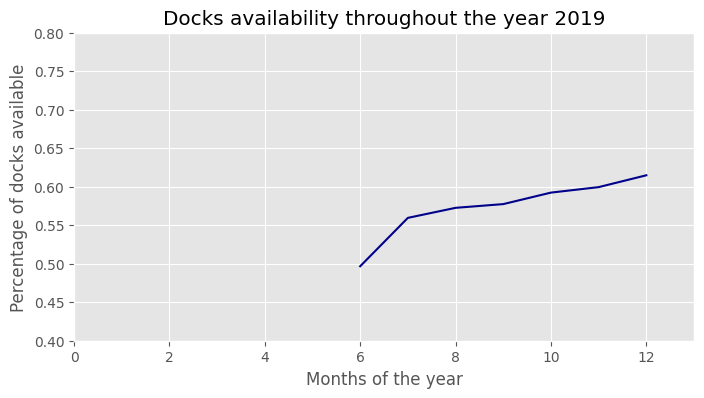

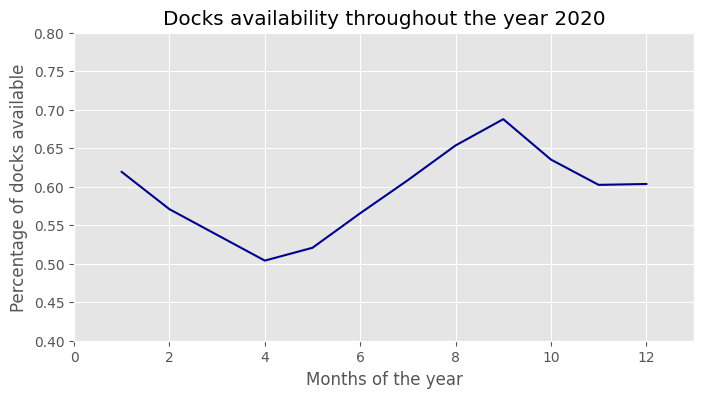

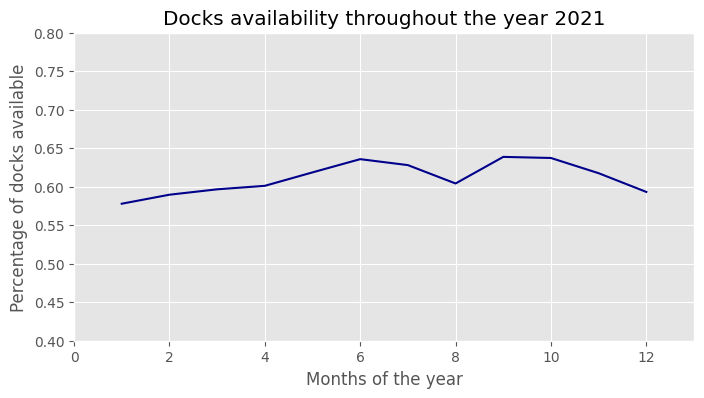

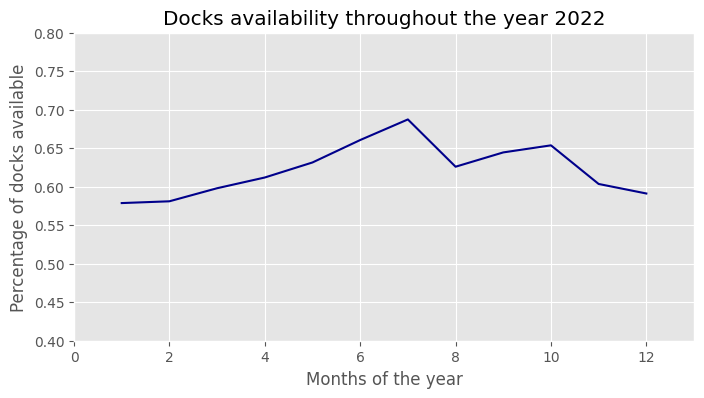

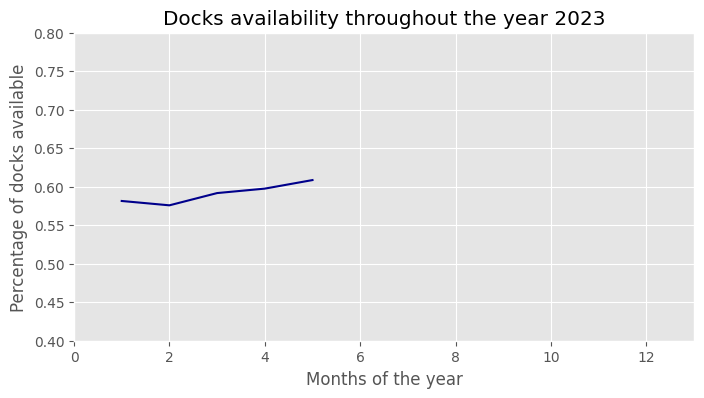

In [29]:
for year in [2019, 2020, 2021, 2022, 2023]:
    fig, ax= plt.subplots(figsize=(8, 4))
    (bicing_status
     .query(f'year == {year}')
     .groupby(by=['month'])['percentage_docks_available'].mean()
     .plot(ax=ax, xlim=(0, 13), ylim=(0.4, 0.8), c='darkblue')
    )
    plt.xlabel('Months of the year')
    plt.ylabel('Percentage of docks available')
    plt.title(f'Docks availability throughout the year {year}')

In [30]:
meteo_stats_22 = pd.read_csv(r'..\data\raw\meteo_stats\2022\2022_MeteoCat_Detall_Estacions.csv', parse_dates=['DATA_LECTURA'], usecols=['DATA_LECTURA', 'CODI_ESTACIO', 'ACRÒNIM', 'VALOR'])
meteo_stats_22.head()

,DATA_LECTURA,CODI_ESTACIO,ACRÒNIM,VALOR
0,2022-01-01,D5,TM,17.8
1,2022-01-01,D5,TX,21.9
2,2022-01-01,D5,TN,14.8
3,2022-01-01,D5,HRM,33.0
4,2022-01-01,D5,HRX,62.0


In [31]:
meteo_stats_22.dtypes

DATA_LECTURA    datetime64[ns]
CODI_ESTACIO            object
ACRÒNIM                 object
VALOR                  float64
dtype: object

In [32]:
meteo_features = ['year', 'month', 'day', 'TM', 'TN', 'TX', 'HRM', 'HRN', 'HRX', 'PPT', 'RS24h', 'PM', 'PN', 'PX', 'VVM10', 'VVX10', 'DVM10', 'DVVX10']
(meteo_stats_22
 .pivot_table(index='DATA_LECTURA', columns='ACRÒNIM', 
              values='VALOR', aggfunc='mean')
 .rename_axis(None, axis='columns')
 .reset_index()
 .assign(year=lambda df_: df_['DATA_LECTURA'].dt.year,
         month=lambda df_: df_['DATA_LECTURA'].dt.month,
         day=lambda df_: df_['DATA_LECTURA'].dt.day)
 .drop(columns='DATA_LECTURA')
 .loc[:, meteo_features]
)

,year,month,day,TM,TN,TX,HRM,HRN,HRX,PPT,RS24h,PM,PN,PX,VVM10,VVX10,DVM10,DVVX10
0,2022,1,1,13.100,8.900,18.550,69.75,43.75,89.75,0.100000,9.133333,1005.966667,1004.766667,1007.000000,2.333333,6.200000,193.666667,276.000000
1,2022,1,2,12.050,7.900,15.725,78.75,48.50,98.75,0.000000,8.766667,1006.833333,1005.766667,1007.966667,1.600000,6.200000,250.666667,285.666667
2,2022,1,3,11.700,8.550,16.050,79.00,52.00,94.25,0.033333,7.933333,1002.700000,996.666667,1007.266667,1.966667,7.100000,249.000000,250.333333
3,2022,1,4,14.225,9.950,20.500,68.75,44.25,96.50,0.000000,8.833333,989.966667,983.600000,996.700000,2.600000,7.433333,259.000000,114.666667
4,2022,1,5,9.850,6.575,13.175,74.00,43.75,97.75,10.066667,4.933333,989.066667,983.733333,993.100000,3.200000,11.866667,331.000000,256.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022,12,27,13.600,10.350,18.675,74.50,51.50,93.25,0.000000,8.366667,1008.633333,1007.366667,1010.500000,1.733333,6.033333,257.000000,244.666667
361,2022,12,28,12.750,9.425,17.700,75.25,58.50,89.00,0.000000,8.566667,1003.733333,1000.766667,1007.433333,2.800000,7.800000,260.666667,248.333333
362,2022,12,29,13.450,9.575,18.675,62.50,42.00,80.00,0.000000,6.366667,999.633333,998.133333,1001.066667,2.466667,7.900000,274.666667,293.666667
363,2022,12,30,15.250,11.800,18.300,62.00,48.50,77.00,0.000000,5.000000,1000.233333,998.233333,1003.400000,3.200000,12.233333,283.333333,311.666667


### Data fields description
-----
1. __DATA_LECTURA__ _(from 2019)_ - Date of registration of the measure
1. __DVM10__  _(from 2019)_ - Average daily wind direction (sensors at 10m) (º) ->__rename__ as: <code>avg_wind_direction</code>
1. __DVVX10__  _(from 2019)_ - Direction of the streak max. daily wind 10 m (º) ->__rename__ as: <code>max_streak_wind_direction</code>
1. __HRM__ _(from 2019)_ - Average daily relative humidity (%) ->__rename__ as: <code>avg_rel_humidity</code>
1. __HRN__ - Minimum daily relative humidity (%) ->__rename__ as: <code>min_rel_humidity</code>
1. __HRX__ - Maximum daily relative humidity (%) ->__rename__ as: <code>max_rel_humidity</code>
1. __PM/HPA__  _(from 2019)_ - Average daily atmospheric pressure (hPa) ->__rename__ as: <code>avg_atm_preassure</code>
1. __PN__ - Minimum daily atmospheric pressure (hPa) ->__rename__ as: <code>min_atm_preassure</code>
1. __PPT/PPT24H__  _(from 2019)_ - Accumulated daily precipitation (mm) ->__rename__ as: <code>acum_precipitation</code>
1. __PX__ - Maximum daily atmospheric pressure (hPa) ->__rename__ as: <code>max_atm_preassure</code>
1. __RS24H__  _(from 2019)_ - Daily global solar radiation (MJ/m2)->__rename__ as: <code>global_solar_rad</code>
1. __TM__ _(from 2019)_ - Average daily temperature (ºC) ->__rename__ as: <code>avg_temp</code>
1. __TN__ _(from 2019)_ - Minimum daily temperature (ºC) ->__rename__ as: <code>min_temp</code>
1. __TX__ _(from 2019)_ - Maximum daily temperature (ºC) ->__rename__ as: <code>max_temp</code>
1. __VVM10__  _(from 2019)_ - Average daily wind speed (sensors at 10 m) (m/s) ->__rename__ as: <code>avg_wind_speed</code>
1. __VVX10__  _(from 2019)_ - Maximum daily wind speed 10 m (m/s) ->__rename__ as: <code>max_wind_speed</code>



In [33]:
pd.crosstab(index=meteo_stats_22.DATA_LECTURA, columns=meteo_stats_22.ACRÒNIM, values=meteo_stats_22.VALOR, aggfunc='mean').rename_axis(None, axis='columns').reset_index()

,DATA_LECTURA,DVM10,DVVX10,HRM,HRN,HRX,PM,PN,PPT,PX,RS24h,TM,TN,TX,VVM10,VVX10
0,2022-01-01,193.666667,276.000000,69.75,43.75,89.75,1005.966667,1004.766667,0.100000,1007.000000,9.133333,13.100,8.900,18.550,2.333333,6.200000
1,2022-01-02,250.666667,285.666667,78.75,48.50,98.75,1006.833333,1005.766667,0.000000,1007.966667,8.766667,12.050,7.900,15.725,1.600000,6.200000
2,2022-01-03,249.000000,250.333333,79.00,52.00,94.25,1002.700000,996.666667,0.033333,1007.266667,7.933333,11.700,8.550,16.050,1.966667,7.100000
3,2022-01-04,259.000000,114.666667,68.75,44.25,96.50,989.966667,983.600000,0.000000,996.700000,8.833333,14.225,9.950,20.500,2.600000,7.433333
4,2022-01-05,331.000000,256.666667,74.00,43.75,97.75,989.066667,983.733333,10.066667,993.100000,4.933333,9.850,6.575,13.175,3.200000,11.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,257.000000,244.666667,74.50,51.50,93.25,1008.633333,1007.366667,0.000000,1010.500000,8.366667,13.600,10.350,18.675,1.733333,6.033333
361,2022-12-28,260.666667,248.333333,75.25,58.50,89.00,1003.733333,1000.766667,0.000000,1007.433333,8.566667,12.750,9.425,17.700,2.800000,7.800000
362,2022-12-29,274.666667,293.666667,62.50,42.00,80.00,999.633333,998.133333,0.000000,1001.066667,6.366667,13.450,9.575,18.675,2.466667,7.900000
363,2022-12-30,283.333333,311.666667,62.00,48.50,77.00,1000.233333,998.233333,0.000000,1003.400000,5.000000,15.250,11.800,18.300,3.200000,12.233333


In [34]:
meteo_stats_19_fabra = pd.read_csv(r'..\data\raw\meteo_stats\2019\2019_d5_observatori_fabra.csv', parse_dates=['DATA_LECTURA'])
meteo_stats_19_fabra

,CODI_ESTACIO,DATA_LECTURA,TM,TX,TN,HRM,PPT24H,HPA,RS24H,VVM10,DVM10,VVX10,DVX10
0,D5,01/01/1996,13.2,17.7,10.0,NaN,0.0,955.9,NaN,6.0,NaN,12.5,268.0
1,D5,02/01/1996,11.3,15.4,9.2,NaN,0.0,965.6,NaN,7.3,NaN,16.6,310.0
2,D5,03/01/1996,9.9,14.7,6.6,63.0,0.0,969.9,NaN,6.7,NaN,NaN,NaN
3,D5,04/01/1996,10.3,12.5,NaN,63.0,0.0,967.0,NaN,4.1,NaN,10.1,268.0
4,D5,05/01/1996,9.8,13.3,6.6,87.0,1.2,956.0,NaN,4.6,NaN,11.8,314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,D5,27/12/2019,9.7,13.0,6.6,70.0,0.0,979.1,8.7,5.8,328.0,13.4,313.0
8762,D5,28/12/2019,10.1,13.1,8.2,74.0,0.0,981.0,8.2,1.5,185.0,4.6,123.0
8763,D5,29/12/2019,9.4,12.5,8.2,85.0,0.0,982.6,5.1,1.7,21.0,4.2,199.0
8764,D5,30/12/2019,8.8,12.6,7.6,81.0,0.0,983.0,5.2,3.0,298.0,6.6,290.0


In [35]:
(meteo_stats_19_fabra
 .assign(DATA_LECTURA=pd.to_datetime(meteo_stats_19_fabra['DATA_LECTURA'], dayfirst=True), year=lambda df_: df_['DATA_LECTURA'].dt.year,
         month=lambda df_: df_['DATA_LECTURA'].dt.month, day=lambda df_: df_['DATA_LECTURA'].dt.day)
 .query('year == 2019')
 .drop(columns=['CODI_ESTACIO', 'DATA_LECTURA'])
)

,TM,TX,TN,HRM,PPT24H,HPA,RS24H,VVM10,DVM10,VVX10,DVX10,year,month,day
8401,10.5,14.4,7.8,73.0,0.0,979.6,5.4,3.8,339.0,15.8,315.0,2019,1,1
8402,8.9,12.9,5.9,48.0,0.0,976.5,9.4,8.3,324.0,17.3,318.0,2019,1,2
8403,8.3,12.6,4.9,59.0,0.0,979.0,9.1,4.0,279.0,9.9,313.0,2019,1,3
8404,7.2,11.3,5.3,69.0,0.0,980.6,8.0,2.0,205.0,7.8,290.0,2019,1,4
8405,9.1,15.2,3.2,47.0,0.0,978.6,9.3,10.0,326.0,17.0,317.0,2019,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,9.7,13.0,6.6,70.0,0.0,979.1,8.7,5.8,328.0,13.4,313.0,2019,12,27
8762,10.1,13.1,8.2,74.0,0.0,981.0,8.2,1.5,185.0,4.6,123.0,2019,12,28
8763,9.4,12.5,8.2,85.0,0.0,982.6,5.1,1.7,21.0,4.2,199.0,2019,12,29
8764,8.8,12.6,7.6,81.0,0.0,983.0,5.2,3.0,298.0,6.6,290.0,2019,12,30


In [36]:
meteo_stats_20 = pd.read_csv(r'..\data\raw\meteo_stats\2020\2020_MeteoCat_Detall_Estacions.csv', parse_dates=['DATA_LECTURA'])
meteo_stats_20.head()

,DATA_LECTURA,DATA_EXTREM,CODI_ESTACIO,ACRÒNIM,VALOR
0,2020-01-01,NaN,D5,TM,7.0
1,2020-01-01,13:30:00,D5,TX,11.5
2,2020-01-01,01:37:00,D5,TN,4.6
3,2020-01-01,NaN,D5,HRM,81.0
4,2020-01-01,20:30:00,D5,HRX,91.0


In [37]:
(meteo_stats_22
 .pivot_table(index='DATA_LECTURA', columns='ACRÒNIM', 
              values='VALOR', aggfunc='mean')
 .rename_axis(None, axis='columns')
 .reset_index()
 .assign(year=lambda df_: df_['DATA_LECTURA'].dt.year,
         month=lambda df_: df_['DATA_LECTURA'].dt.month,
         day=lambda df_: df_['DATA_LECTURA'].dt.day)
 .drop(columns='DATA_LECTURA')
#  .loc[:, meteo_features]
)

,DVM10,DVVX10,HRM,HRN,HRX,PM,PN,PPT,PX,RS24h,TM,TN,TX,VVM10,VVX10,year,month,day
0,193.666667,276.000000,69.75,43.75,89.75,1005.966667,1004.766667,0.100000,1007.000000,9.133333,13.100,8.900,18.550,2.333333,6.200000,2022,1,1
1,250.666667,285.666667,78.75,48.50,98.75,1006.833333,1005.766667,0.000000,1007.966667,8.766667,12.050,7.900,15.725,1.600000,6.200000,2022,1,2
2,249.000000,250.333333,79.00,52.00,94.25,1002.700000,996.666667,0.033333,1007.266667,7.933333,11.700,8.550,16.050,1.966667,7.100000,2022,1,3
3,259.000000,114.666667,68.75,44.25,96.50,989.966667,983.600000,0.000000,996.700000,8.833333,14.225,9.950,20.500,2.600000,7.433333,2022,1,4
4,331.000000,256.666667,74.00,43.75,97.75,989.066667,983.733333,10.066667,993.100000,4.933333,9.850,6.575,13.175,3.200000,11.866667,2022,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,257.000000,244.666667,74.50,51.50,93.25,1008.633333,1007.366667,0.000000,1010.500000,8.366667,13.600,10.350,18.675,1.733333,6.033333,2022,12,27
361,260.666667,248.333333,75.25,58.50,89.00,1003.733333,1000.766667,0.000000,1007.433333,8.566667,12.750,9.425,17.700,2.800000,7.800000,2022,12,28
362,274.666667,293.666667,62.50,42.00,80.00,999.633333,998.133333,0.000000,1001.066667,6.366667,13.450,9.575,18.675,2.466667,7.900000,2022,12,29
363,283.333333,311.666667,62.00,48.50,77.00,1000.233333,998.233333,0.000000,1003.400000,5.000000,15.250,11.800,18.300,3.200000,12.233333,2022,12,30


In [38]:
meteo_stats_19_path = r'..\data\raw\meteo_stats\2019'
csv_files = glob.glob(meteo_stats_19_path + '/*.csv')

meteo_stats_19 = pd.concat([pd.read_csv(file) for file in tqdm(csv_files)])

  0%|          | 0/4 [00:00<?, ?it/s]

In [39]:
def clean_meteo_stats_19(df):
    return (df
            .assign(DATA_LECTURA=pd.to_datetime(df['DATA_LECTURA'], dayfirst=True), year=lambda df_: df_['DATA_LECTURA'].dt.year,
                    month=lambda df_: df_['DATA_LECTURA'].dt.month, day=lambda df_: df_['DATA_LECTURA'].dt.day)
            .query('year == 2019')
            .drop(columns=['CODI_ESTACIO', 'DATA_LECTURA'])
            .groupby(by=['year', 'month', 'day'], as_index=False).mean()
    )

In [40]:
clean_meteo_stats_19(meteo_stats_19)

,year,month,day,TM,TX,TN,HRM,PPT24H,HPA,RS24H,VVM10,DVM10,VVX10,DVX10
0,2019,1,1,10.975,15.700,7.025,72.25,0.0,1007.700000,7.000000,2.166667,319.000000,10.900000,306.333333
1,2019,1,2,9.600,14.750,6.200,52.50,0.0,1004.600000,9.233333,3.666667,299.000000,11.266667,310.333333
2,2019,1,3,8.750,13.175,5.225,60.00,0.0,1007.333333,8.933333,2.133333,273.333333,6.833333,294.000000
3,2019,1,4,7.650,11.975,4.400,67.75,0.0,1009.066667,7.866667,1.366667,197.000000,5.566667,178.000000
4,2019,1,5,9.475,15.225,4.950,51.25,0.0,1006.766667,9.233333,5.033333,301.333333,11.766667,297.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019,12,27,10.675,13.950,7.850,70.25,0.0,1007.266667,8.666667,3.066667,305.666667,9.966667,314.666667
361,2019,12,28,10.500,14.525,7.125,77.25,0.0,1009.133333,8.033333,1.066667,173.000000,4.366667,135.666667
362,2019,12,29,11.425,14.050,9.925,78.00,0.0,1010.833333,6.166667,1.200000,122.333333,4.033333,221.666667
363,2019,12,30,10.700,14.125,7.925,75.50,0.0,1011.333333,4.866667,1.666667,309.000000,5.233333,249.333333


In [41]:
def clean_meteo_stats(df):
    return (df
            .pivot_table(index='DATA_LECTURA', columns='ACRÒNIM',
                         values='VALOR', aggfunc='mean')
            .rename_axis(None, axis='columns')
            .reset_index()
            .assign(year=lambda df_: df_['DATA_LECTURA'].dt.year,
                    month=lambda df_: df_['DATA_LECTURA'].dt.month,
                    day=lambda df_: df_['DATA_LECTURA'].dt.day)
            .drop(columns=['DATA_LECTURA', 'HRN', 'HRX', 'PN', 'PX'])
        
    )

In [42]:
def load_meteo_stats(year):
    
    if year == 2019:
        meteo_stats_19_path = r'..\data\raw\meteo_stats\2019'
        csv_files = glob.glob(meteo_stats_19_path + '/*.csv')
        
        meteo_stats_19 = pd.concat([pd.read_csv(file) for file in tqdm(csv_files)])
        
        return clean_meteo_stats_19(meteo_stats_19)
        
    else:
        file_path = fr'..\data\raw\meteo_stats\{year}\{year}_MeteoCat_Detall_Estacions.csv'
        try:
            return clean_meteo_stats(pd.read_csv(file_path, parse_dates=['DATA_LECTURA']))
        except FileNotFoundError:
            return None

In [43]:
def tweak_meteo_stats(df):

    def int_to_uint16(df_):
        cols = df_.select_dtypes(int)
        return (df_
                .astype({col:'uint16' for col in cols}))
    
    def float64_to_float32(df_):
        cols = df_.select_dtypes('float64')
        return (df_
                .astype({col:'float32' for col in cols}))
    
    return (df
            .rename(columns={'TM': 'avg_temp', 'TN': 'min_temp', 'TX': 'max_temp', 
                            'HRM': 'avg_rel_humidity', 'PPT': 'acum_precipitation', 
                            'PPT24H': 'acum_precipitation', 'RS24h': 'global_solar_rad', 'RS24H': 'global_solar_rad', 
                            'PM': 'avg_atm_pressure', 'HPA': 'avg_atm_pressure', 'VVM10': 'avg_wind_speed', 
                            'VVX10': 'max_wind_speed', 'DVM10': 'avg_wind_direction', 'DVVX10': 'max_streak_wind_direction'})
            .pipe(int_to_uint16)
            .pipe(float64_to_float32)
            )

In [44]:
meteo_stats = pd.concat([tweak_meteo_stats(load_meteo_stats(year)) for year in tqdm([2020, 2021, 2022, 2023])])
meteo_stats

  0%|          | 0/4 [00:00<?, ?it/s]

,avg_wind_direction,max_streak_wind_direction,avg_rel_humidity,avg_atm_pressure,acum_precipitation,global_solar_rad,avg_temp,min_temp,max_temp,avg_wind_speed,max_wind_speed,year,month,day
0,186.333328,300.666656,77.25,1010.333313,0.0,8.733334,8.375000,4.900,12.425000,1.566667,6.766667,2020,1,1
1,274.000000,260.666656,78.25,1010.033325,0.0,7.600000,9.025000,5.325,13.775000,2.833333,8.166667,2020,1,2
2,289.333344,294.333344,71.75,1009.166687,0.0,6.766667,9.325000,6.450,13.000000,2.733333,7.833333,2020,1,3
3,291.000000,299.000000,61.00,1009.533325,0.0,8.933333,9.900000,5.850,15.375000,3.066667,12.566667,2020,1,4
4,62.666668,233.000000,63.50,1007.033325,0.0,9.233334,10.175000,5.775,15.375000,2.500000,10.100000,2020,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,103.333336,85.000000,80.00,999.633362,0.0,27.533333,18.100000,13.875,21.950001,2.066667,7.000000,2023,5,26
146,232.666672,221.000000,59.50,996.766663,0.0,27.933332,21.450001,16.725,26.750000,2.433333,7.766667,2023,5,27
147,241.333328,223.333328,56.25,993.033325,0.0,28.066668,21.575001,17.600,26.424999,3.100000,9.133333,2023,5,28
148,103.666664,176.000000,73.25,993.166687,0.0,26.366667,19.600000,17.000,23.250000,2.133333,7.366667,2023,5,29


In [45]:
meteo_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 149
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   avg_wind_direction         1246 non-null   float32
 1   max_streak_wind_direction  1246 non-null   float32
 2   avg_rel_humidity           1246 non-null   float32
 3   avg_atm_pressure           1246 non-null   float32
 4   acum_precipitation         1246 non-null   float32
 5   global_solar_rad           1246 non-null   float32
 6   avg_temp                   1246 non-null   float32
 7   min_temp                   1246 non-null   float32
 8   max_temp                   1246 non-null   float32
 9   avg_wind_speed             1246 non-null   float32
 10  max_wind_speed             1246 non-null   float32
 11  year                       1246 non-null   uint16 
 12  month                      1246 non-null   uint16 
 13  day                        1246 non-null   uint16 
dty

In [46]:
meteo_stats.isna().sum()

avg_wind_direction           0
max_streak_wind_direction    0
avg_rel_humidity             0
avg_atm_pressure             0
acum_precipitation           0
global_solar_rad             0
avg_temp                     0
min_temp                     0
max_temp                     0
avg_wind_speed               0
max_wind_speed               0
year                         0
month                        0
day                          0
dtype: int64

In [47]:
# converting the meteo_stats DataFrame into a parquet file
meteo_stats.to_parquet(fr'..\data\processed\meteo_stats.parquet')